## <center>Анализ результатов опроса увольняющихся сотрудников: Оценка влияния стажа работы и возраста</center>

                                                               Проект выполнен: Резвухин Д.И., май 2022 г.

### Введение

В рамках реализации данного проекта мы будем работать с результатами опроса сотрудников, которые по тем или иным причинам расторгли договор трудоустройства в двух организациях, расположенных в Квинсленде, Австралия: Department of Education, Training and Employment (DETE) и Technical and Further Education (TAFE) institute. 

В рамках анализа данных нам предстоит ответить на два типа вопросов:

* Как много сотрудников, имеющих небольшой стаж в данных организациях, увольняются из-за недовольства условиями работы? Какова пропорция таких увольнений среди более опытных коллег?
* Как много молодых сотрудников увольняется из-за недовольства условиями работы? Какова пропорция таких увольнений у более возрастных работников?

Для исследования доступны два файла опросов, по одному для каждой организации (`dete_survey.csv` и `tafe_survey.csv`). Оба опроса выполнены по похожим (хотя и не идентичным) шаблонам. Для выполнения задач исследования, предлагается скомбинировать эти опросы и работать с единой базой данных. 

Оригинального датасета с результатами опроса TAFE уже не существует. Датасет DETE доступен на [сайте правительства Австралии](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). В настоящем проекте используются датасеты в слегка модицифированном виде (включая замену кодировки с `cp1252` на `UTF-8`). Данный проект является учебным, его основная обучающая цель — овладение методами очистки данных и комбинирования датафреймов, базового анализа данных. 

Ниже приводится словарь базы данных для ключевых столбцов в датасетах:

#### Features `dete_survey.csv`

`ID`: An id used to identify the participant of the survey

`SeparationType`: The reason why the person's employment ended

`Cease Date`: The year or month the person's employment ended

`DETE Start Date`: The year the person began employment with the DETE

#### Features `tafe_survey.csv`

`Record ID`: An id used to identify the participant of the survey

`Reason for ceasing employment`: The reason why the person's employment ended

`LengthofServiceOverall.` Overall Length of Service at Institute (in years): The length of the person's employment (in years)

### 1. Исследование датасетов

Импортируем необходимые библиотеки и познакомимся с датасетами. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# улучшим качество графиков, переведя их в векторный формат svg
import matplotlib_inline.backend_inline  
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
pd.set_option('display.max_rows', None)
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

В обоих датасетах достаточно много столбцов (56 и 72 соответственно), а также множество пропущенных значений. По всей видимости, это связано со спецификой проводившихся опросов, которые, с одной стороны, были достаточно подробными, но с другой, не требовали однозначных ответов на все вопросы. Отметим, что для выполнения задач проекта многие столбцы не нужны, впоследствии мы можем их удалить.

### 2. Подготовка датасетов к анализу, часть I
Из полученной информации можно дополнительно сделать следующие выводы:

* Датасет `dete_survey` содержит значения `'Not Stated'`, которые по сути являются аналогом пропущенных значений. Имеет смысл сразу учесть это при создании датафрейма.
* Сравнивая датасеты, можно заметить, что они содержат ряд столбцов с аналогичным содержанием, однако названия этих колонок различны.
* В датасетах есть множество ответов, которые указывают на то, что причина увольнения заключается в недовольстве каким-либо фактором в процессе работы.

Процесс подготовки данных к анализу мы начнем с того, что учтем `'Not Stated'` как пропущенные значения в датафрейме `dete_survey`, а также удалим колонки, которые не важны для ответа на поставленные вопросы.

In [8]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49])
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66])
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Для того, чтобы в будущем правильно объединить оба датафрейма, нужно привести к общему виду названия столбцов, которые содержат аналогичные данные. Для этого в датафрейме `dete_survey_updated` мы просто почистим названия столбцов и приведем их в формат snakecase (в котором несколько слов разделяются символом подчеркивания и слова пишутся с маленькой буквы), а в датафрейме `tafe_survey_updated` заменим названия ключевых столбцов так, чтоб они совпадали с названиями столбцов в `dete_survey_updated`.

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns \
                              .str.lower().str.strip().str.replace(' ', '_')

tafe_survey_updated = tafe_survey_updated.rename(columns={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
})

In [11]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Одним из важнейших столбцов в обоих датафреймах является столбец `separationtype`, в котором указана причина увольнения. Составим таблицы распределения частот для этого столбца:

In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Нас в первую очередь интересует причина `Resignation`, т.е. в данном случае уход с должности, не связанный с возрастом, состоянием здоровья, истечением контракта и прочими факторами, которые сразу объясняют увольнение. Однако нужно обратить внимание на то, что в датафрейме `dete_survey_updated` есть три типа такого увольнения: `Resignation-Other reasons`, `Resignation-Other employer` и `Resignation-Move overseas/interstate`. Мы должны учесть эти подвиды, чтобы не потерять нужные для анализа данные.

Создадим новые датафреймы с приставкой resignations, в которых будут результаты опроса сотрудников только с этой причиной увольнения.

In [15]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']
                                        .isin(['Resignation-Other reasons', 
                                               'Resignation-Other employer', 
                                               'Resignation-Move overseas/interstate'])].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

### 3. Подготовка датасетов к анализу, часть II: проверка дат

После проведенных процедур мы должны еще раз все проверить и убедиться, что данные готовы к анализу. В первую очередь имеет смысл проверить, чтобы в колонках с указанными датами были корректные данные.

In [16]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

Здесь нет особой необходимости использовать модуль `datetime`; для исследования нам понадобится только год увольнения как число, чтобы можно было рассчитать стаж. Мы переведем строки с шаблоном "месяц/год" просто в "год" и заменим тип данных на `float`. В тип `float` данные переводятся для однотипного сопоставления с другими датами в датафреймах, которые сейчас приведены именно в этом формате.

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

Посмотрим на изменения:

In [18]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Теперь посмотрим даты в столбце `dete_start_date` (год приема на работу):

In [19]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: dete_start_date, dtype: int64

Здесь данные приведены в нужном нам формате (год в формате `float`). 

Теперь посмотрим таблицу распределения частот для столбца с датами для датасета `tafe_resignations` (в этом датафрейме указан только год увольнения):

In [20]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

В целом, из приведенных выше данных следует, что никаких серьезных проблем с указанными датами приема на работу и датами увольнения нет, т.е. нет времени в будущем либо, например, ошибочно введенных очень старых дат.

Поскольку одна из целей нашего проекта заключается в том, чтобы выделить пропорцию уволившихся из-за недовольства сотрудников, которые проработали недолго, и их коллег с более высоким стажем, нам нужно проанализировать данные в колонке `service` (англ. "стаж"). В датасете `tafe_resignations` такая колонка есть (`institute_service`), однако для датасета `dete_resignations` нам нужно будет создать такой столбец самостоятельно. Для этого просто вычтем из года увольнения год принятия на должность:

In [21]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
12.0     6
14.0     6
18.0     5
16.0     5
24.0     4
23.0     4
11.0     4
32.0     3
39.0     3
21.0     3
19.0     3
25.0     2
28.0     2
26.0     2
30.0     2
36.0     2
33.0     1
35.0     1
49.0     1
38.0     1
41.0     1
27.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: institute_service, dtype: int64

### 4. Выявление сотрудников, выразивших неудовлетворенность условиями труда

В датасетах есть несколько столбцов, в которых содержится информация о том, были ли у работников причины для недовольства. Мы будем использовать эти столбцы для выявления таких сотрудников.

В датафрейме `dete_resignations` это столбцы:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

В датафрейме `tafe_resignations` это столбцы:
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`

В обоих датафреймах мы создадим новую колонку `dissatisfied`, в которой будут значения `True` или `False` в зависимости от того, указал ли сотрудник *хотя бы одну* причину для недовольства в соответствующих колонках. Если это так, значение в столбце `dissatisfied` будет `True`, если нет — `False`.

В датафрейме `dete_resignations` значения в этих столбцах уже приведены как логический тип данных: `True` или `False`. 

Например: 

In [22]:
dete_resignations['workload'].value_counts(dropna=False)

False    284
True      27
Name: workload, dtype: int64

In [23]:
"""К этим колонкам мы просто применим метод `DataFrame.any()`, 
   чтобы перевести значения в них к единому значению в столбце `dissatisfied`. 
   Этот метод как нельзя лучше подходит к данной ситуации, так как возвращает `True`,
   если хотя бы одно значение среди набора данных является `True`."""

dete_resignations['dissatisfied'] = dete_resignations.iloc[:, np.r_[13:20, 25:27]] \
                                                     .any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

Для датафрейма `tafe_resignations` все немного сложнее. Тут мы имеем дело всего с двумя столбцами, однако значения в них приведены несколько в ином виде, нежели `True` или `False`. Так, здесь есть прочерк (что аналогично отрицательному ответу или `False`), Dissatisfaction (что равносильно `True`), а также небольшое количество пропущенных значений:

In [24]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [25]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Подобно датафрейму `dete_resignations`, сделаем аналогичный столбец `dissatisfied` в датафрейме `tafe_resignations`. 

In [26]:
"""Для этого напишем простую функцию, которая разделит данные на категории, 
   и применим ее к значениям в столбцах с помощью метода `df.applymap()`"""

def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

    
tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']] \
= tafe_resignations[['Contributing Factors. Dissatisfaction', 
                     'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']] \
                                                       .any(axis=1, skipna=False)

tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

После всех выполненных процедур два датафрейма готовы для соединения.

### 5. Соединение датафреймов
Перед непосредственно соединением датафремов, добавим в каждый из них столбец, который позволит легко идентифицировать, из какого именно датафрейма взяты данные. Мы также еще немного почистим данные и удалим из получившегося датафрейма столбцы, в которых количество заполненных (т.е. не-NaN) значений ниже 500.

In [27]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)
combined.dropna(axis='columns', thresh=500, inplace=True)
combined.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


### 6. Влияние стажа работы

Для того чтобы определить, как стаж работы связан с увольнениями из-за недовольства условиями труда, нам предстоит подготовить к анализу столбец `institute_service`, а котором указан стаж работы. Дело в том, что значения в нем представлены в весьма "разношерстном" виде:

In [29]:
combined['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

Здесь есть как отдельные значения, так и категории (например, 'More than 20 years').

Поскольку необходимости проводить слишком дробный анализ нет, имеет смысл перевести эти данные в более удобные для восприятия категории. Логично выделить следующие категории сотрудников:

* Junior: Работал в организации менее 3 лет
* Middle: Проработал 3-6 лет
* Senior: Проработал 7-10 лет
* Veteran: Проработал 11 лет и более

Для перевода имеющихся данных в категории напишем функцию, которая будет последовательно проверять каждую строку и помещать в соответствующую категорию. Предварительно переведем данные в формат `str` и оставим только стаж без дополнительных слов, если таковые имелись, потом вернем данные обратно в числовой тип.

In [30]:
combined['institute_service'] = combined['institute_service'].astype(str).str.extract(r'(\d+)')
combined['institute_service'] = combined['institute_service'].astype(float)
combined['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

In [31]:
def categories(service):
    if pd.isnull(service):
        return 'Unknown'
    elif service in (0, 1, 2):
        return 'Junior'
    elif service in (3, 4, 5, 6):
        return 'Middle'
    elif service in (7, 8, 9, 10):
        return 'Senior'
    else:
        return 'Veteran'
    
combined['service_cat'] = combined['institute_service'].apply(categories)
combined['service_cat'].value_counts()

Junior     193
Middle     172
Veteran    136
Unknown     88
Senior      62
Name: service_cat, dtype: int64

После того, как мы распределили сотрудников по группам в зависимости от их стажа работы, можно посмотреть, каков процент работников, уволившихся из-за недовольства, в каждой группе. Поскольку значения в столбце `dissatisfied` приведены в логическом выражении (`True` либо `False`), то при количественных подсчетах эти данные примут значения 1 и 0 соотвественно. Среднее для этой колонки будет являться как раз пропорциональным количеством работников, уволившихся из-за недовольства (потому что среднее — это отношение суммы к общему количеству).

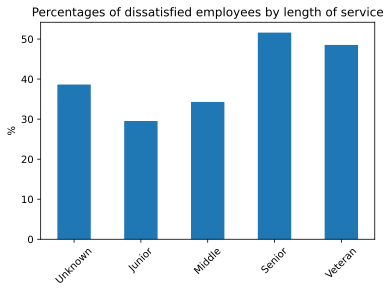

In [32]:
by_group = combined.groupby('service_cat')['dissatisfied'].mean() * 100
by_group = by_group.reindex(['Unknown', 'Junior', 'Middle', 'Senior', 'Veteran'])
by_group.plot(kind='bar', rot=45, legend=None)
plt.xlabel('')
plt.ylabel('%')
plt.title('Percentages of dissatisfied employees by length of service')
plt.show()

Из приведенной выше бар-диаграммы видно, что процентное соотношение сотрудников, уволившихся из-за недовольства, повышается в ряду Junior-Middle-Senior, примерно от 30% до 52%. В категории Veteran пропорция таких сотрудников тоже достаточно высокая (48.5%), сравнимая с категорией Senior (52%). 

### 7. Влияние возраста

Теперь посмотрим на влияние такого фактора как возраст работников на количество принимаемых решений прекратить договор трудоустройства из-за недовольства каким-либо аспектом работы. Для этого посмотрим, какие значения приведены в столбце `age`:

In [33]:
combined['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Здесь указаны значения возраста в определенных пределах. Аналогично процедуре работы с данными о стаже работников, выделим только первое значение возраста в интервале (нижнюю планку), которое будем считать возрастом сотрудника. Впоследствии переведем эти значения возраста в более общие категории.

In [34]:
combined['age'] = combined['age'].str.extract(r'(\d+)').astype(float)
combined['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
NaN     55
61.0    23
20.0    10
Name: age, dtype: int64

Далее можно написать похожую функцию, которая разделит сотрудников на несколько групп в зависимости от возраста, и применить ее к столбцу `age`. Таких категорий будет пять: меньше 30 лет, 31-40 лет, 41-50 лет, 51-60 лет, более 60 лет. 

In [35]:
"""Немного иной подход в плане реализации кода 
   (но почти такой же по логике процесса и времени исполнения) 
   заключается в использовании метода `pd.cut()`, 
   который разделяет набор данных на указанные категории в зависимости от значений."""

age_ranges = [18, 30, 40, 50, 60, np.inf]
group_names = ['less than 30', '31-40', '41-50', '51-60', 'more than 60']
combined['age_cat'] = pd.cut(combined['age'], bins=age_ranges, labels=group_names)
combined['age_cat'] = combined['age_cat'].cat.add_categories(['Age is unknown'])
combined['age_cat'].fillna('Age is unknown', inplace=True)
combined['age_cat'].value_counts()

41-50             174
less than 30      139
31-40             134
51-60             126
Age is unknown     55
more than 60       23
Name: age_cat, dtype: int64

После этого посчитаем пропорции сотрудников, уволившихся из-за недовольства, для каждой возрастной категории, и построим бар-диаграмму:

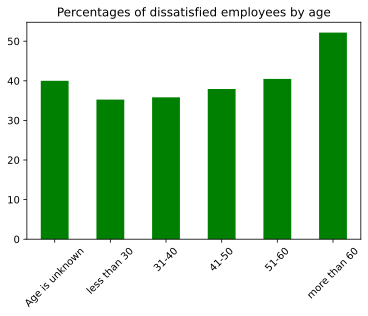

In [36]:
by_age = combined.groupby('age_cat')['dissatisfied'].mean() * 100
by_age = by_age.reindex(['Age is unknown', 'less than 30', '31-40', '41-50', '51-60', 'more than 60'])
by_age.plot(kind='bar', rot=45, color='green')
plt.xlabel('')
plt.title('Percentages of dissatisfied employees by age')
plt.show()

Как можно увидеть на графике выше, пропорция работников, которые увольняются из-за недовольства каким-либо фактором, последовательно растет с повышением возраста. При этом отметим, однако, что пропорция таких работников повышается достаточно плавно. Так, например, пропорция уволившихся из-за недовольства молодых людей до 30 лет составляет примерно 35%, в то время как в возрастной категории 51-60 лет доля таких работников около 40%, то есть разница с молодежью составляет всего около 5%. Только достаточно возрастные работники старше 60 лет обнаруживают существенно более высокую пропорцию неудовлетворенных условиями труда (> 50%). 

Таким образом, повышение стажа работы предъявляет большие требования к условиям труда, нежели повышение возраста, по крайней мере в двух изученных австралийских организациях.

### Заключение

В данном проекте было выполнено достаточно много операций, направленных на очистку данных и подготовку датафреймов к анализу. Нам удалось показать, что пропорция сотрудников, увольняющихся из организаций Department of Education, Training and Employment (DETE) и Technical and Further Education (TAFE) institute (Квинсленд, Австралия), растет с повышением трудового стажа и возраста сотрудников, при этом наиболее выраженный рост наблюдается в ряду Junior-Middle-Senior (от 30 до 52 %). 

Назвать это причинно-следственной зависимостью, по-видимому, не совсем корректно, так как не рабочий стаж и возраст человека как таковые (в виде времени) влияют на принимаемое сотрудником решение об увольнение, а скорее производные этих характеристик в виде накопленного опыта, как профессионального, так и жизненного. Опытные сотрудники более внимательно относятся к своему комфорту на рабочем месте, имеют большую востребованность на рынке труда, и не боятся поменять рабочие условия на новые в случае неудовлетворенности каким-либо аспектом на текущем месте работы. 

Также можно заключить, что, в свою очередь, более молодые сотрудники, среди которых пропорция недовольных ниже, чем у более возрастных/опытных коллег, чаще меняют работу не по причине недовольства чем-либо на рабочем месте, а просто в силу своего роста и перехода на более перспективную и/или высокоплачиваемую должность.